# Analysis of tipping bucket precipitation counts
This notebook illustrates how one can analyze a cumulative count vs. time to derive intensities (i.e., rates at which counts occur over time) within various discrete time intervals. The assumption is that the counts occur each time a given depth of rainfall, here 1/100th of an inch, accumulates.

### Import required libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

#Enable interactive figures
%matplotlib notebook 

### Import the data

Here, the assumption is that the data has been downloaded and formatted in an Excel spreadsheet. Note that while this notebook illustrates methods for cleaning and sub-sampling the dataset, it may be easier to simply clean the data in the spreadsheet.

Either way, when data are read usually helpful to read the date-time data into a Pandas date-time format. A challenge can occur when importing data that has dates formatted according to the European standard, with dates listed as YYYY-DD-MM. In this case, data can be imported using the "dayfirst" argument. If importing data in YYYY-MM-DD format, this argument is not needed.  

Note that if your dataset has column names that differ from those used here, please adjust the snippets accordingtly.  For examply, you should change ['When'] to whatever name you used in your spreadsheet for the date-time column.  

In [2]:
df = pd.read_excel('ExampleRainData.xlsx')
df['When'] = pd.to_datetime(df['When'],dayfirst=True)
display(df)

,When,total,battery,reset_cause,tempC
0,2022-02-25 02:44:19,4,3.543,1,22
1,2022-02-25 02:45:56,9,3.543,1,22.25
2,2022-02-25 02:46:49,10,3.543,1,22
3,2022-02-25 02:47:40,11,3.543,1,22
4,2022-02-25 02:51:27,16,3.543,1,22
...,...,...,...,...,...
417,2022-03-01 01:59:00,221,3.889,1,11
418,2022-03-01 02:12:54,222,3.889,1,11
419,2022-03-01 02:23:30,223,3.889,1,11.25
420,2022-03-01 02:31:09,224,3.889,1,11.5


### Set the index
Graphing in Pandas is easiest if the index is set to the date-time column. Again, change the string 'When' to whatever is being used to represent your date-time column.

In [3]:
df = df.set_index('When')
display(df)

,total,battery,reset_cause,tempC
When,,,,
2022-02-25 02:44:19,4,3.543,1,22
2022-02-25 02:45:56,9,3.543,1,22.25
2022-02-25 02:46:49,10,3.543,1,22
2022-02-25 02:47:40,11,3.543,1,22
2022-02-25 02:51:27,16,3.543,1,22
...,...,...,...,...
2022-03-01 01:59:00,221,3.889,1,11
2022-03-01 02:12:54,222,3.889,1,11
2022-03-01 02:23:30,223,3.889,1,11.25


### Make a graph

<IPython.core.display.Javascript object>


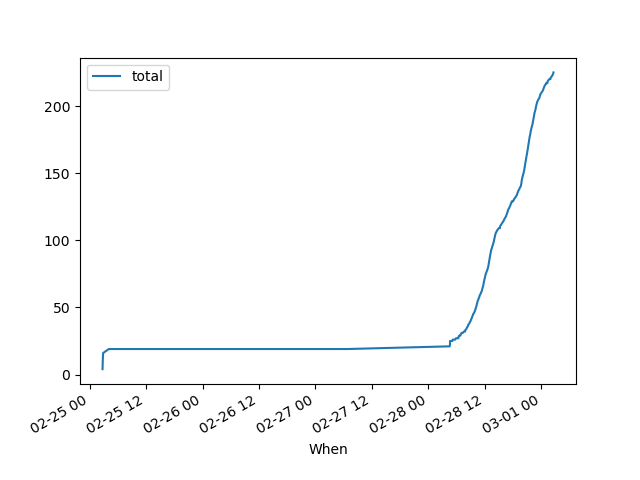

<AxesSubplot:xlabel='When'>

In [4]:
fig1, ax = plt.subplots()
df.plot(y='total', ax=ax)

In the above, several days are plotted before the main storm event.  It can be helpful to re-sample just the data from the 28th of February, when the total count was 22.  For this, we can reset the value of the count to a new total representing the total precipitation AFTER midnight on the 28th of February.

### Reset the count to the value on February 28

In [5]:
df['newtotal']=df['total']-22
display(df)

,total,battery,reset_cause,tempC,newtotal
When,,,,,
2022-02-25 02:44:19,4,3.543,1,22,-18
2022-02-25 02:45:56,9,3.543,1,22.25,-13
2022-02-25 02:46:49,10,3.543,1,22,-12
2022-02-25 02:47:40,11,3.543,1,22,-11
2022-02-25 02:51:27,16,3.543,1,22,-6
...,...,...,...,...,...
2022-03-01 01:59:00,221,3.889,1,11,199
2022-03-01 02:12:54,222,3.889,1,11,200
2022-03-01 02:23:30,223,3.889,1,11.25,201


### Drop all the regular updates
The original dataset includes many lines of data when no precipitation occurred but the device simply posted a regular status update. For analysis, we do not care about these regular updates. We only care about the lines where the bucket tip occurred.  This is only the case where the reset_cause variable was equal to 1. Here we create a new filtered data frame representing only the data associated with that cause.

In [6]:
df_filtered = df[df['reset_cause'] == 1]
display(df_filtered)

,total,battery,reset_cause,tempC,newtotal
When,,,,,
2022-02-25 02:44:19,4,3.543,1,22,-18
2022-02-25 02:45:56,9,3.543,1,22.25,-13
2022-02-25 02:46:49,10,3.543,1,22,-12
2022-02-25 02:47:40,11,3.543,1,22,-11
2022-02-25 02:51:27,16,3.543,1,22,-6
...,...,...,...,...,...
2022-03-01 01:59:00,221,3.889,1,11,199
2022-03-01 02:12:54,222,3.889,1,11,200
2022-03-01 02:23:30,223,3.889,1,11.25,201


Now any data that did not have a reset cause of 1 should have been removed.

### Select a range of dates
Our graph will be nicer if we only start on the 28th. One way to accomplish this is to create a new dataframe that includes only the date range we care about. Note that in your dataset, this date range may vary.

In [7]:
df_subset = df_filtered.loc['2022-2-27':'2022-3-1'] 
display(df_subset)

,total,battery,reset_cause,tempC,newtotal
When,,,,,
2022-02-28 04:35:24,22,3.543,1,10,0
2022-02-28 04:37:07,25,3.889,1,10.25,3
2022-02-28 05:10:53,26,3.889,1,10.5,4
2022-02-28 05:51:47,27,3.889,1,10.5,5
2022-02-28 06:25:01,28,3.889,1,10,6
...,...,...,...,...,...
2022-03-01 01:59:00,221,3.889,1,11,199
2022-03-01 02:12:54,222,3.889,1,11,200
2022-03-01 02:23:30,223,3.889,1,11.25,201


Because of the correction we applied earlier, the first "newtotal" in this dataframe really starts with zero.

### Now plot this new dataset

<IPython.core.display.Javascript object>


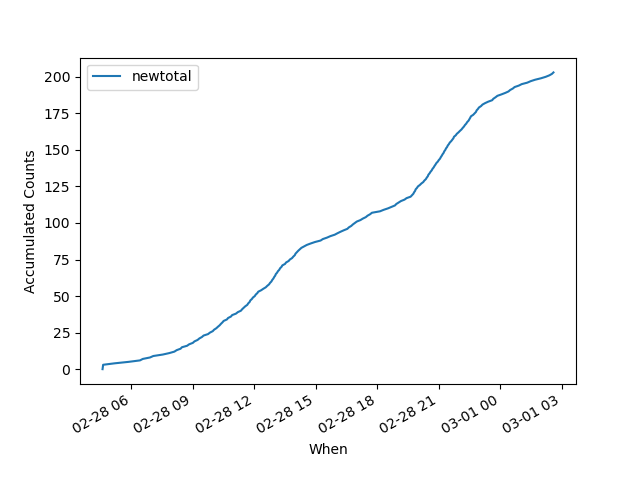

Text(0, 0.5, 'Accumulated Counts')

In [8]:
fig2, ax = plt.subplots(1,1)
ax = df_subset.plot(y="newtotal", ax=ax)
ax.set_ylabel("Accumulated Counts")


We can compare this to the previous, original total by adding a second line to the figure. Note that the syntax for adding additional datasets to the graph would be similar. Note that because of the offset we applied, the newtotal starts at zero, not at 22.

<IPython.core.display.Javascript object>


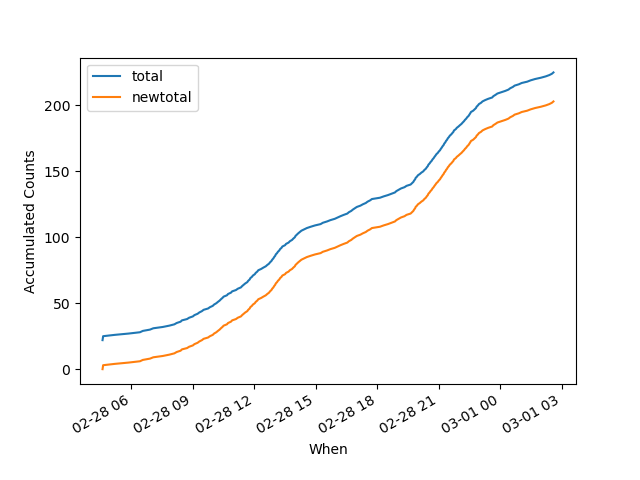

Text(0, 0.5, 'Accumulated Counts')

In [9]:
fig3, ax = plt.subplots(1,1)
df_subset.plot(y="total", ax=ax)
df_subset.plot(y="newtotal", ax=ax)
ax.set_ylabel("Accumulated Counts")

### Resample to a higher resolution so that we can analyze the incremental counts

Ultimately, we want to find the total number of tips that occur within a given period of time, probably computed on some regular interval. It's helpful if these intervals start and logical times, so here, we'll create a new dataframe that has data every single minute, starting at 0 seconds. The pandas resample() function allows this.  Here, if we resample with argument 'T', it samples every minute.  We could sample every 15 minutes using '15T' or every hour using 'H'.  Other options are documented in the pandas.dataframe.resample() help pages, which can easily be found with a simple web search.

When we resample, we have to specify what method is used to fill in the number. We could find things like the sum, mean, median, and so on, of the variable that we are resampling.  For instance, if a dataframe included three rows, one for time 2 minutes, one for time 3 minutes, and one for time 7 minutes, and if the values of the variable x in these rows were 2, 3, and 1, respectively, the df.resample('5T').sum() function would result in a new dataframe with two rows, one representing time 0, and one representing time 5.  The values in these rows would be 5 (the sum of 2 and 3) and 1 (the only value in the original dataframe that appears during the second five-minute interval). In our case, we don't want to sum our counts, we just want the value of the count valid at the beginning of each minute of our deployment. The "Ffill" method (which stands for forward fill) allows us to do this by simply picking the value of the total that was present in our original dataframe for the period immediately before each minute we are considering in the new, resampled dataframe.   

#### Ffill to minutely totals

In [10]:
df_minutely = pd.DataFrame()
df_minutely['total']=df_subset['newtotal'].resample('T').ffill()
display(df_minutely)

,total
When,
2022-02-28 04:35:00,NaN
2022-02-28 04:36:00,0.0
2022-02-28 04:37:00,0.0
2022-02-28 04:38:00,3.0
2022-02-28 04:39:00,3.0
...,...
2022-03-01 02:31:00,201.0
2022-03-01 02:32:00,202.0
2022-03-01 02:33:00,202.0


In the above, the original dataframe did not begin until after 4:35:00, so the first number in the resampled dataframe is "NaN", or not a number.  Then, the first count (0) is used to fill in the values for 04:36:00 and 04:37:00. The total became 3 in the original dataframe at 04:37:07, so this value is used to fill in the total count at 04:38:00, and so on.

### Find amount of precipitation in previous periods.
Our goal in this assignment is to find out the maximum precipitation in 15-minute and 1-hour periods.  Here, we can compute how much precipitation we had in the previous 15 minutes or in the previous hour by simply subtracting the total precipitation we tabulated "n" rows earlier using the Pandas .shift(n) function.  The df.shift(n) function returns the value n rows earlier in the table.

In [11]:
df_minutely['last60min']=df_minutely['total']-df_minutely['total'].shift(60)
df_minutely['last15min']=df_minutely['total']-df_minutely['total'].shift(15)
df_minutely

,total,last60min,last15min
When,,,
2022-02-28 04:35:00,NaN,NaN,NaN
2022-02-28 04:36:00,0.0,NaN,NaN
2022-02-28 04:37:00,0.0,NaN,NaN
2022-02-28 04:38:00,3.0,NaN,NaN
2022-02-28 04:39:00,3.0,NaN,NaN
...,...,...,...
2022-03-01 02:31:00,201.0,4.0,1.0
2022-03-01 02:32:00,202.0,5.0,2.0
2022-03-01 02:33:00,202.0,5.0,2.0


We now have data gives us the amount of precipitation occuring in each 15-minute and each 1-hour period, starting at any minute during the deployment.  We have NaN values for the first few rows because it's not possible to shift earlier than the beginning of the table. 

### Downsample on even hours
While what we have done so far should be enough to address the lab assignment, it might still be nice to compute the incremental rainfall totals for time intervals that start at logical points in time (e.g., for hours that start on the our).  We can accomplish this by resampling the previous minultely data onto new, regularly spaced intervals. For this, we'll want to select the very first value in the resampling period, which will present the cumulative count valid at the beginning of the interval. We can then easily compute the amount of rainfall that occurred between this time and the next time interval (the so-called "incremental rainfall") by shifting a single row down and subtracting.


In [12]:
df_hourly= pd.DataFrame()
df_hourly['total']=df_minutely['total'].resample('H').first()
df_hourly['incremental']=df_hourly['total'].shift(-1)-df_hourly['total']
df_hourly

,total,incremental
When,,
2022-02-28 04:00:00,0.0,3.0
2022-02-28 05:00:00,3.0,2.0
2022-02-28 06:00:00,5.0,3.0
2022-02-28 07:00:00,8.0,3.0
2022-02-28 08:00:00,11.0,7.0
2022-02-28 09:00:00,18.0,8.0
2022-02-28 10:00:00,26.0,11.0
2022-02-28 11:00:00,37.0,12.0
2022-02-28 12:00:00,49.0,14.0


### Plot hourly incremental totals
We can now create a simple bar plot to represent the incremental totals.  We are labeling them in real units of 1/100th of an inch because each tip of the gage represents 1/100th of an inch.

<IPython.core.display.Javascript object>


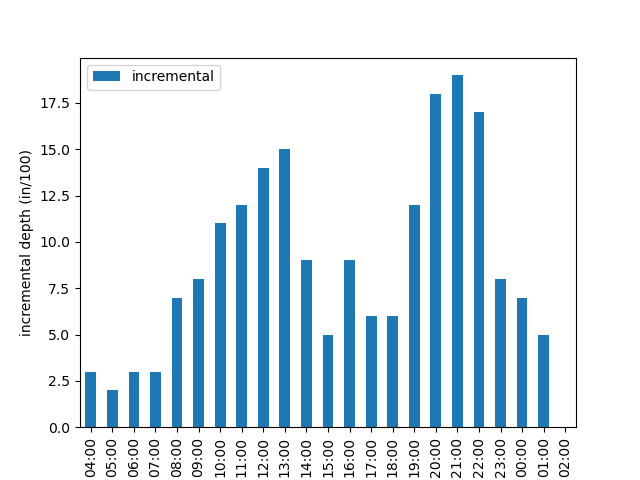

<AxesSubplot:xlabel='When', ylabel='incremental depth (in/100)'>

In [13]:
fig4,ax = plt.subplots(1,1)
ax.set_ylabel("incremental depth (in/100)")
df_hourly.plot(y='incremental', kind='bar', ax = ax)

The x-axis labels are not particularly helpful here, but we can clean this up as by defining a tick format. We do this by creating an array of strings that we use as labels.  The strings just show the hour, then the minute.  These strings are then placed on each tick.

<IPython.core.display.Javascript object>


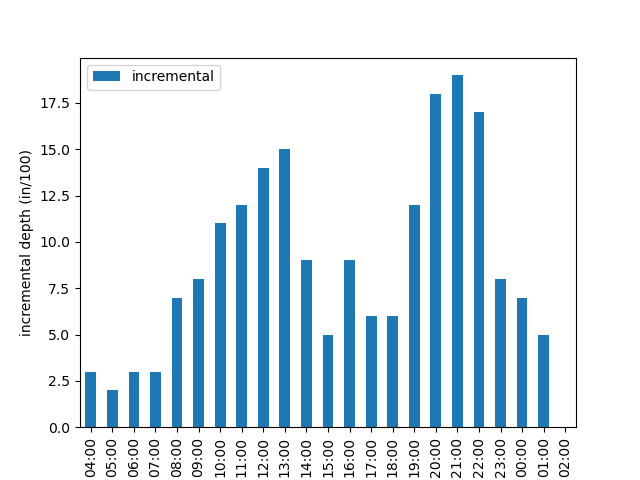

In [14]:
import matplotlib.ticker as ticker
ticklabels = [item.strftime('%H:%M') for item in df_hourly.index]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
fig4

Note the more logical ticks now on the figure.

### Downsample to even 15-minute periods

We now compute 15-minute incremental totals for time increments of 15-minutes that occur on the quarter-hour.

In [15]:
df_15minutely= pd.DataFrame()
df_15minutely['total']=df_minutely['total'].resample('15T').first()
df_15minutely['incremental']=df_15minutely['total'].shift(-1)-df_15minutely['total']
df_15minutely

,total,incremental
When,,
2022-02-28 04:30:00,0.0,3.0
2022-02-28 04:45:00,3.0,0.0
2022-02-28 05:00:00,3.0,1.0
2022-02-28 05:15:00,4.0,0.0
2022-02-28 05:30:00,4.0,0.0
...,...,...
2022-03-01 01:30:00,197.0,1.0
2022-03-01 01:45:00,198.0,1.0
2022-03-01 02:00:00,199.0,1.0


### Plot 15 minute incremental totals

<IPython.core.display.Javascript object>


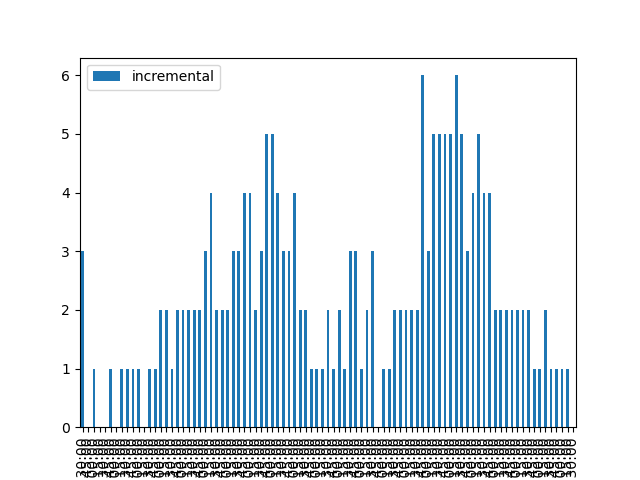

<AxesSubplot:xlabel='When'>

In [16]:
fig5, ax = plt.subplots(1,1)
df_15minutely.plot(y='incremental', kind='bar', ax = ax)

The dates need some help in the above.  The following code fixes them.

<IPython.core.display.Javascript object>


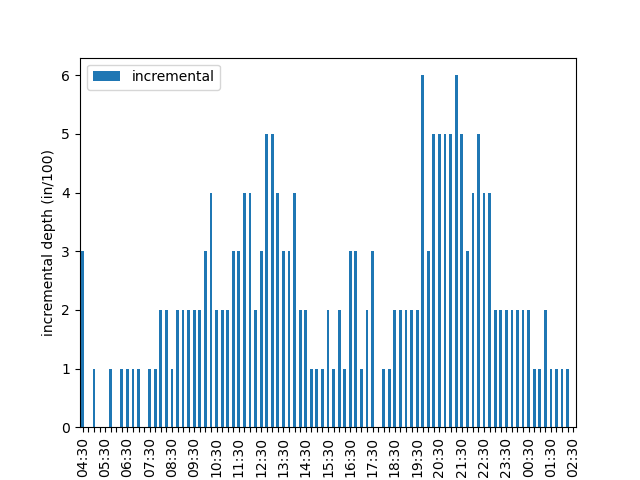

In [17]:
import matplotlib.ticker as ticker
ax=df_15minutely.plot(y='incremental',kind='bar', stacked=True)
ticklabels = ['']*len(df_15minutely.index)
ticklabels[::4] = [item.strftime('%H:%M') for item in df_15minutely.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_ylabel("incremental depth (in/100)")
ax.set_xlabel("Time (hr)")
plt.show()

Note that the above graph represents counts per quarter hour, so these numbers are quite a bit lower than the counts computed for the hour-long intervals. It is easier to compare these numbers if we plot intensity, in inches per hour, rather than simple counts.  Using the formula for intensity that we discussed in the Chapther 19 of the textbook:

$$i=\frac{\Delta P}{\Delta t}$$

with $\Delta t$ = 15 min = 0.25 hr, we get

<IPython.core.display.Javascript object>


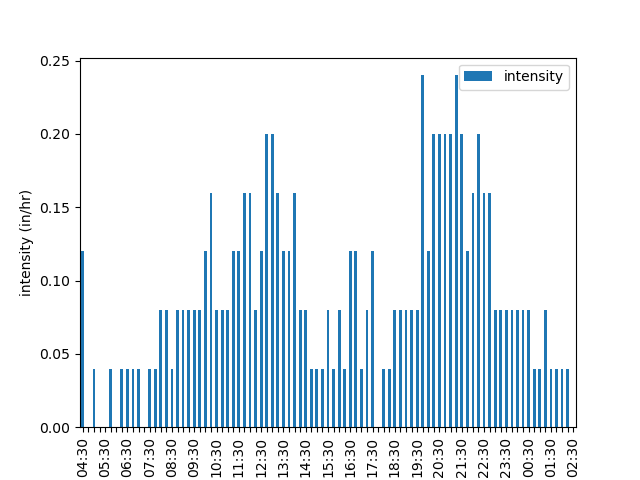

In [18]:
df_15minutely['intensity']=df_15minutely['incremental']/0.25/100

ax=df_15minutely.plot(y='intensity',kind='bar', stacked=True)
ticklabels = ['']*len(df_15minutely.index)
ticklabels[::4] = [item.strftime('%H:%M') for item in df_15minutely.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.set_ylabel("intensity (in/hr)")
ax.set_xlabel("Time (hr)")
plt.show()
